In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv("synthetic_energy_consumption.csv", parse_dates=["Timestamp"])
df.set_index("Timestamp", inplace=True)

# Display first few rows
df.head()



,Energy_Consumption
Timestamp,
2025-01-01 00:00:00,106.692457
2025-01-01 01:00:00,104.145069
2025-01-01 02:00:00,99.613654
2025-01-01 03:00:00,109.890627
2025-01-01 04:00:00,105.237329


In [3]:
#Summary statistics
df.describe()

,Energy_Consumption
count,8760.000000
mean,100.023229
std,16.555314
min,53.909929
25%,87.179359
50%,99.804705
75%,112.857167
max,141.060188


In [4]:
#Check for missing values
df.isnull().sum()

Energy_Consumption    0
dtype: int64

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

#Plot entire time series
plt.figure(figsize=(12,5))
plt.plot(df.index, df["Energy_Consumption"], label="Energy Consumption")
plt.title("Synthetic Energy Consumption Over Time")
plt.xlabel("Time")
plt.ylabel("Energy Consumption (kWh)")
plt.legend()
plt.grid()
plt.show()

ModuleNotFoundError: No module named 'seaborn'

In [6]:
seaborn --version

NameError: name 'seaborn' is not defined

In [7]:
!pip install seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


You should consider upgrading via the 'C:\Users\reedj\OneDrive\Desktop\Energy_analysis\energy_forecast_env\Scripts\python.exe -m pip install --upgrade pip' command.


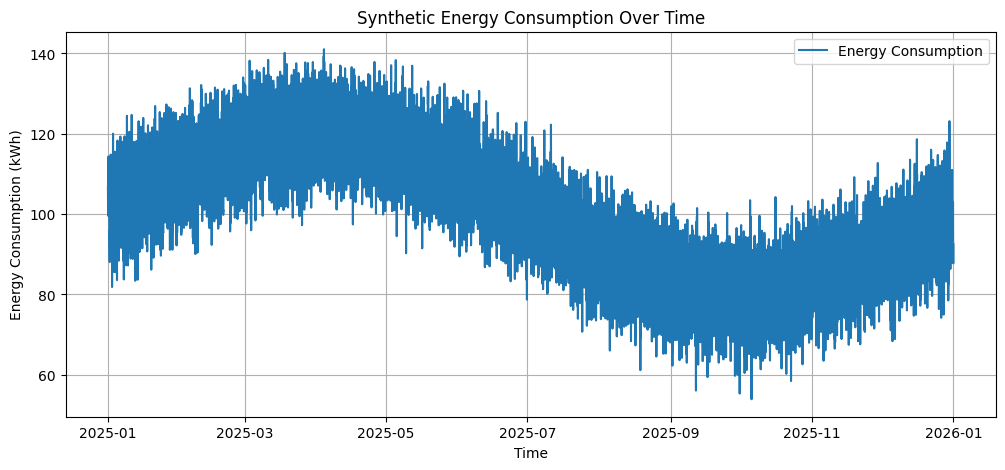

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the entire time series
plt.figure(figsize=(12, 5))
plt.plot(df.index, df["Energy_Consumption"], label="Energy Consumption")
plt.title("Synthetic Energy Consumption Over Time")
plt.xlabel("Time")
plt.ylabel("Energy Consumption (kWh)")
plt.legend()
plt.grid()
plt.show()


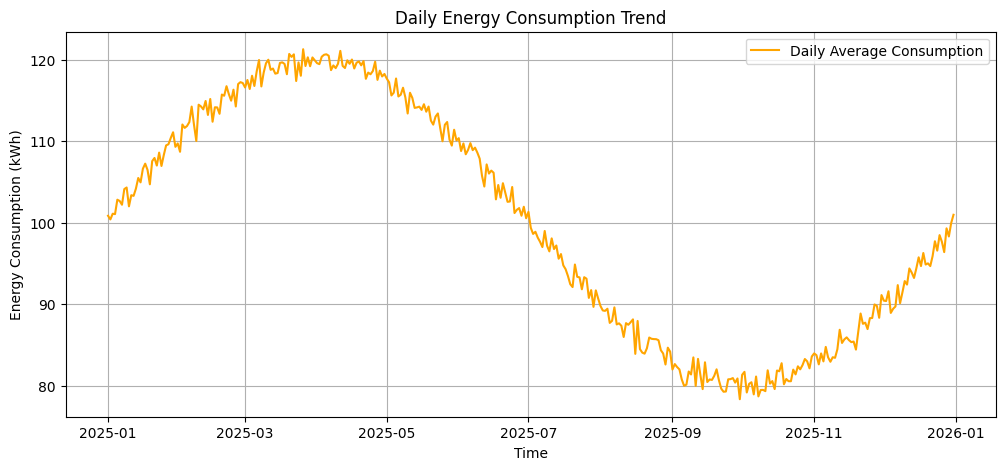

In [9]:
# Resample data to daily averages
df_daily = df.resample("D").mean()

plt.figure(figsize=(12, 5))
plt.plot(df_daily.index, df_daily["Energy_Consumption"], label="Daily Average Consumption", color="orange")
plt.title("Daily Energy Consumption Trend")
plt.xlabel("Time")
plt.ylabel("Energy Consumption (kWh)")
plt.legend()
plt.grid()
plt.show()


In [10]:
!pip install fpdf

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Using legacy 'setup.py install' for fpdf, since package 'wheel' is not installed.
  Running setup.py install for fpdf: started
  Running setup.py install for fpdf: finished with status 'done'


You should consider upgrading via the 'C:\Users\reedj\OneDrive\Desktop\Energy_analysis\energy_forecast_env\Scripts\python.exe -m pip install --upgrade pip' command.


In [11]:
import fpdf
print(fpdf.__version__)

1.7.2


In [12]:
#Generate a Summary Report 

from fpdf import FPDF

pdf = FPDF()
pdf.add_page()
pdf.set_font("Arial", style='', size=12)

pdf.cell(200, 10, "Energy Consumption Analysis", ln=True, align='C')
pdf.ln(10)
pdf.multi_cell(0, 10, "This report summarizes the key findings from the synthetic energy consumption dataset.")

pdf.multi_cell(0, 10, "Key Observations:\n- Mean Consumption: ~100 kWh\n- Seasonal trends: Higher in winter, lower in summer\n- Daily fluctuations observed with peaks at certain hours.")

pdf.multi_cell(0, 10, "Next Steps:\n- Implementing ARIMA, Prophet, and LSTM forecasting models.")

pdf.output("energy_analysis_summary.pdf")


''